# Exploring the encoder strucutre

 link: [here](https://amitness.com/2020/02/tensorflow-hub-for-transfer-learning/)


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
import tensorflow_text

In [3]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")


In [2]:
# get some data
df = pd.read_csv('http://bit.ly/clickbait-data')

In [3]:
# create a tensorflow modelw with the first layer frozen
model = tf.keras.models.Sequential()

use = 'https://tfhub.dev/google/universal-sentence-encoder/4'

# use this if you want multi-lingual capability
# use2 = 'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3'

# set up model
model.add(hub.KerasLayer(use, 
                        input_shape=[], 
                        dtype=tf.string, 
                        trainable=False))

# add layers
model.add(tf.keras.layers.Dense(25, activation='relu', name='dense_2'))
model.add(tf.keras.layers.Dropout(0.1, name='dropout_1'))
model.add(tf.keras.layers.Dense(25, activation='relu', name='dense_3'))
model.add(tf.keras.layers.Dropout(0.1, name='dropout_2'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid', name='output'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 512)               256797824 
_________________________________________________________________
dense_2 (Dense)              (None, 25)                12825     
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                650       
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
output (Dense)               (None, 1)                 26        
Total params: 256,811,325
Trainable params: 13,501
Non-trainable params: 256,797,824
_____________________________________

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 512)               68927232  
_________________________________________________________________
dense_2 (Dense)              (None, 25)                12825     
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                650       
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
output (Dense)               (None, 1)                 26        
Total params: 68,940,733
Trainable params: 13,501
Non-trainable params: 68,927,232
_____________________________________

In [4]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')],
              optimizer=tf.keras.optimizers.Adam())


In [5]:
df.head()

,title,label
0,"15 Highly Important Questions About Adulthood,...",1
1,250 Nuns Just Cycled All The Way From Kathmand...,1
2,"Australian comedians ""could have been shot"" du...",0
3,Lycos launches screensaver to increase spammer...,0
4,Fußball-Bundesliga 2008–09: Goalkeeper Butt si...,0


In [6]:
# set up train/test
x_train, x_test, y_train, y_test = train_test_split(df['title'], 
                                                    df['label'], 
                                                    test_size=0.1, 
                                                    stratify=df['label'], 
                                                    random_state=42)

In [7]:
model.fit(x_train, 
          y_train, 
          epochs=5,
          validation_data=(x_test, y_test))

Epoch 1/5
900/900 [==============================] - 6s 5ms/step - loss: 0.1275 - accuracy: 0.9629 - val_loss: 0.0725 - val_accuracy: 0.9781
Epoch 2/5
900/900 [==============================] - 4s 5ms/step - loss: 0.0669 - accuracy: 0.9771 - val_loss: 0.0681 - val_accuracy: 0.9787
Epoch 3/5
900/900 [==============================] - 4s 5ms/step - loss: 0.0602 - accuracy: 0.9786 - val_loss: 0.0656 - val_accuracy: 0.9778
Epoch 4/5
900/900 [==============================] - 5s 5ms/step - loss: 0.0513 - accuracy: 0.9822 - val_loss: 0.0618 - val_accuracy: 0.9794
Epoch 5/5
900/900 [==============================] - 5s 5ms/step - loss: 0.0458 - accuracy: 0.9844 - val_loss: 0.0622 - val_accuracy: 0.9797


In [8]:
# get some predictions
results = model.predict(["21 Pictures That Will Make You Feel Like You're 99 Years Old", 
               "will you like the map of the cat", 
               'Google announces TensorFlow 2.0']).squeeze()


np.round(results,3)

array([1.   , 0.999, 0.085], dtype=float32)

In [9]:
# save model
model.save('keras_use')

INFO:tensorflow:Assets written to: keras_use/assets


INFO:tensorflow:Assets written to: keras_use/assets


In [10]:
# load model
model = tf.keras.models.load_model('keras_use')


In [11]:
# sample some random choices
samples = np.random.choice(x_test, 5)

# output sentence and prob belonging to each class
list(zip(samples, model.predict([i for i in samples]).squeeze()))


[("Neville Longbottom Has Grown Himself A Big Ol' Moustache", 0.9946619),
 ("Sunset Hair Has Arrived And It's Drop-Dead Beautiful", 0.9980073),
 ('Icelandic Internet bank suspends UK accounts', 7.8528254e-05),
 ('How Much Do You Hate Halloween', 0.9999862),
 ('Bomb Kills 9 on Minibus in Afghanistan', 7.52449e-05)]

In [ ]:
# all in one space

import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split


# get some data
df = pd.read_csv('http://bit.ly/clickbait-data')

# create a tensorflow modelw with the first layer frozen
model = tf.keras.models.Sequential()

use = 'https://tfhub.dev/google/universal-sentence-encoder/4'

# use this if you want multi-lingual capability
# use2 = 'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3'

# set up model
model.add(hub.KerasLayer(use, 
                        input_shape=[], 
                        dtype=tf.string, 
                        trainable=False))

# add trainable layers
model.add(tf.keras.layers.Dense(25, activation='relu', name='dense_2'))
model.add(tf.keras.layers.Dropout(0.1, name='dropout_1'))
model.add(tf.keras.layers.Dense(25, activation='relu', name='dense_3'))
model.add(tf.keras.layers.Dropout(0.1, name='dropout_2'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid', name='output'))

# show layers
print(model.summary())

# compile model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')],
              optimizer=tf.keras.optimizers.Adam())

# set up train/test
x_train, x_test, y_train, y_test = train_test_split(df['title'], 
                                                    df['label'], 
                                                    test_size=0.1, 
                                                    stratify=df['label'], 
                                                    random_state=42)

# fit model
model.fit(x_train, 
          y_train, 
          epochs=5,
          validation_data=(x_test, y_test))

# save model
model.save('keras_use')

# load model
model = tf.keras.models.load_model('keras_use')

# sample some random choices
samples = np.random.choice(x_test, 5)

# output sentence and prob belonging to each class
list(zip(samples, model.predict([i for i in samples]).squeeze()))

In [19]:
# show lift
import matplotlib.pyplot as plt

def plot_Lift_curve(y_val, y_pred, step=0.01):
    
    #Define an auxiliar dataframe to plot the curve
    aux_lift = pd.DataFrame()
    #Create a real and predicted column for our new DataFrame and assign values
    aux_lift['real'] = y_val
    aux_lift['predicted'] = y_pred
    #Order the values for the predicted probability column:
    aux_lift.sort_values('predicted',ascending=False,inplace=True)
    
    #Create the values that will go into the X axis of our plot
    x_val = np.arange(step,1+step,step)
    #Calculate the ratio of ones in our data
    ratio_ones = aux_lift['real'].sum() / len(aux_lift)
    #Create an empty vector with the values that will go on the Y axis our our plot
    y_v = []
    
    #Calculate for each x value its correspondent y value
    for x in x_val:
        num_data = int(np.ceil(x*len(aux_lift))) #The ceil function returns the closest integer bigger than our number 
        data_here = aux_lift.iloc[:num_data,:]   # ie. np.ceil(1.4) = 2
        ratio_ones_here = data_here['real'].sum()/len(data_here)
        y_v.append(ratio_ones_here / ratio_ones)
        
        print('ratio_ones_here',ratio_ones_here)
        print('ratio_ones',ratio_ones)
           
   #Plot the figure
    fig, axis = plt.subplots()
    fig.figsize = (40,40)
    axis.plot(x_val, y_v, 'g-', linewidth = 3, markersize = 5)
    #axis.plot(x_val, np.ones(len(x_val)), 'k-')
    axis.set_xlabel('Proportion of sample')
    axis.set_ylabel('Lift')
    plt.title('Lift Curve')
    plt.show()

ratio_ones_here 1.0
ratio_ones 0.4998437011566114
ratio_ones_here 1.0
ratio_ones 0.4998437011566114
ratio_ones_here 1.0
ratio_ones 0.4998437011566114
ratio_ones_here 1.0
ratio_ones 0.4998437011566114
ratio_ones_here 0.984375
ratio_ones 0.4998437011566114
ratio_ones_here 0.8322916666666667
ratio_ones 0.4998437011566114
ratio_ones_here 0.7138392857142857
ratio_ones 0.4998437011566114
ratio_ones_here 0.624609375
ratio_ones 0.4998437011566114
ratio_ones_here 0.5552083333333333
ratio_ones 0.4998437011566114
ratio_ones_here 0.4998437011566114
ratio_ones 0.4998437011566114


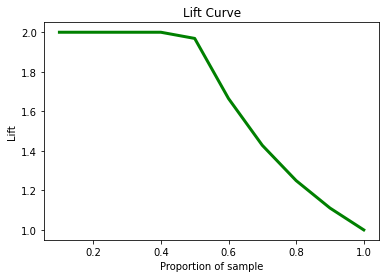

In [33]:
y_pred = model.predict(x_test).squeeze()

plot_Lift_curve(y_val=y_test, y_pred=y_pred, step=0.1)

In [78]:
import plotly.express as px
import plotly.graph_objects as go

# create figure
fig = go.Figure()

df = px.data.gapminder().query("year == 2007")

fig = px.scatter(df, x="gdpPercap", y="lifeExp", hover_name="country") 
                 #log_x=True)

fig.add_scatter(df, x="gdpPercap", y="lifeExp", hover_name="country") 

# Add dropdowns
button_layer_1_height = 1.08
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["log_x", True],
                    label="True",
                    method="update"
                ),
                dict(
                    args=["log_x", False],
                    label="False",
                    method="update"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top"
        )])

fig.show()

ValueError: 
    Invalid value of type 'pandas.core.frame.DataFrame' received for the 'cliponaxis' property of scatter
        Received value:                  country continent  year  lifeExp       pop     gdpPercap  \
11           Afghanistan      Asia  2007   43.828  31889923    974.580338   
23               Albania    Europe  2007   76.423   3600523   5937.029526   
35               Algeria    Africa  2007   72.301  33333216   6223.367465   
47                Angola    Africa  2007   42.731  12420476   4797.231267   
59             Argentina  Americas  2007   75.320  40301927  12779.379640   
...                  ...       ...   ...      ...       ...           ...   
1655             Vietnam      Asia  2007   74.249  85262356   2441.576404   
1667  West Bank and Gaza      Asia  2007   73.422   4018332   3025.349798   
1679         Yemen, Rep.      Asia  2007   62.698  22211743   2280.769906   
1691              Zambia    Africa  2007   42.384  11746035   1271.211593   
1703            Zimbabwe    Africa  2007   43.487  12311143    469.709298   

     iso_alpha  iso_num  
11         AFG        4  
23         ALB        8  
35         DZA       12  
47         AGO       24  
59         ARG       32  
...        ...      ...  
1655       VNM      704  
1667       PSE      275  
1679       YEM      887  
1691       ZMB      894  
1703       ZWE      716  

[142 rows x 8 columns]

    The 'cliponaxis' property must be specified as a bool
    (either True, or False)

In [83]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

# load dataset
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/volcano.csv")

# create figure
fig = go.Figure()


# Add surface trace
fig.add_trace(go.Surface(z=df.values.tolist(), colorscale="Viridis"))

# Update plot sizing
fig.update_layout(
    width=800,
    height=900,
    autosize=False,
    margin=dict(t=0, b=0, l=0, r=0),
    template="plotly_white",
)

# Update 3D scene options
fig.update_scenes(
    aspectratio=dict(x=1, y=1, z=0.7),
    aspectmode="manual"
)

# Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["type", "surface"],
                    label="3D Surface",
                    method="restyle"
                ),
                dict(
                    args=["type", "heatmap"],
                    label="Heatmap",
                    method="restyle"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Add annotation
fig.update_layout(
    annotations=[
        dict(text="Trace type:", showarrow=False,
        x=0, y=1.085, yref="paper", align="left")
    ]
)

fig.show()